
<a id='0'></a>

# Extensive Analysis - EDA + Preprocessing + FE + Modelling 


## Table of Contents


The table of contents for this project is as follows:-

1. [The problem statement](#1)
1. [Import libraries](#2)
1. [Import dataset](#3)
1. [Exploratory data analysis](#4)
    -	[View dimensions of dataset](#4.1)    
    -	[Preview the dataset](#4.2)
    -	[View column names](#4.3)
    -	[View summary of dataset](#4.5)
    -	[View statistical properties of dataset](#4.6)
1.	[Univariate Analysis](#5)
    -	[Explore `RainTomorrow` target variable](#5.1)
    -	[Explore categorical variables](#6.2)
    -	[Explore problems within categorical variables](#6.4)
    -	[Explore numerical variables](#6.5)
    -	[Explore problems within numerical variables](#6.7)
1.	[Multivariate Analysis](#7)
    -   [Heat Map](#7.1)
    -   [Pair Plot](#7.2)
1.	[Declare feature vector and target variable](#8)
1.	[Split data into training and test set](#9)
1.	[Feature Engineering](#10)
    -	[Engineering missing values in numerical variables](#10.1)
    -	[Engineering missing values in categorical variables](#10.2)
    -	[Engineering outliers in numerical variables](#10.3)
    -	[Encode categorical variables](#10.4)
1.	[Feature Scaling](#11)


## 1. The problem statement <a class="anchor" id="1"></a>

In this notebook, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Exlporatory Data Analysis, Feature Engineering and Modelling with Python and Scikit-Learn. 

The dataset used is **Rain in Australia** created by data gathered from a multitude of weather stations: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

In [5]:
!pip install matplotlib-inline ipykernel

  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib_inline-0.1.7-py3-none-any.whl (9.9 kB)


## 2. Import libraries <a class="anchor" id="2"></a>

In [ ]:
# Env: Python 3.12
import os  # for file and directory manipulation
import matplotlib
matplotlib.use('qt5agg')  # o 'tkagg' si llegara a fallar
import matplotlib.pyplot as plt  # for data visualization
import numpy as np  # for linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px  # for interactive plots
import seaborn as sns  # for statistical data visualization

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [2]:
import warnings

warnings.filterwarnings('ignore')

## 3. Import dataset <a class="anchor" id="3"></a>


We read the dataset indicating the file path. We will be using the module Pandas, you can find the documentation here: https://pandas.pydata.org/docs/reference/

In [3]:
data = './weatherAUS.csv'

df = pd.read_csv(data)

## 4. Exploratory data analysis <a class="anchor" id="4"></a>

Exploratory Data Analysis is a series of steps to analyse and investigate a dataset in order to understand it, get the main characteristics and find hidden patterns.

### View dimensions of dataset <a class="anchor" id="4.1"></a>

In [5]:
# Check the shape of the DataFrame
# Output will be (number of rows, number of columns)
df_shape = df.shape
print(f"DataFrame registries: {df_shape[0]}")
print(f"DataFrame variables: {df_shape[1]}")

DataFrame registries: 145460
DataFrame variables: 23


### Preview the dataset <a class="anchor" id="4.2"></a>

In [6]:
# Show the first 5 rows of the DataFrame
df.head()
# print(df.head())
# display(df.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### View column names <a class="anchor" id="4.3"></a>

In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### View summary of dataset <a class="anchor" id="4.5"></a>

In [7]:
# info shows the DataFrame information
# including the number of non-null values and the data types of each column

# Categorical variables have data type `object`.
# Numerical variables have data type `float64`.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### View statistical properties of dataset <a class="anchor" id="4.6"></a>

In [8]:
# describe shows the summary statistics of the DataFrame
# including count, mean, std, min, 25%, 50%, 75%, and max for each column
# The describe method only works with numerical columns.
# To include categorical columns, we can use the `include` parameter
# df.describe(include='all') or df.describe(include='object')

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## 5. Univariate Analysis <a class="anchor" id="5"></a>

Univariate analysis focuses on the statistics of a single variable. This includes distributions, tendencies and variabilities.

### Explore `RainTomorrow` target variable <a class="anchor" id="5.1"></a>

#### Check for missing values

In [9]:
# Missing values are represented as NaN in pandas
# They are also called null values

# The isna() method returns a DataFrame of the same shape as the original DataFrame
# with True for missing values and False for non-missing values

# The sum() method returns the number of missing values (True) for each column

df['RainTomorrow'].isna().sum()

np.int64(3267)

#### View unique values

In [10]:
# With nunique() we can count the number of unique values in a column
# The unique() method returns the unique values in a column
print(df['RainTomorrow'].nunique())
df['RainTomorrow'].unique()

2


array(['No', 'Yes', nan], dtype=object)

#### View the frequency distribution of values

In [11]:
# with value_counts() we can count the number of occurrences of each unique value in a column
# The normalize parameter returns the relative frequencies of the unique values
# The dropna parameter excludes missing values from the count

df['RainTomorrow'].value_counts(normalize=False, dropna=False)

RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64

#### Visualize frequency distribution of `RainTomorrow` variable

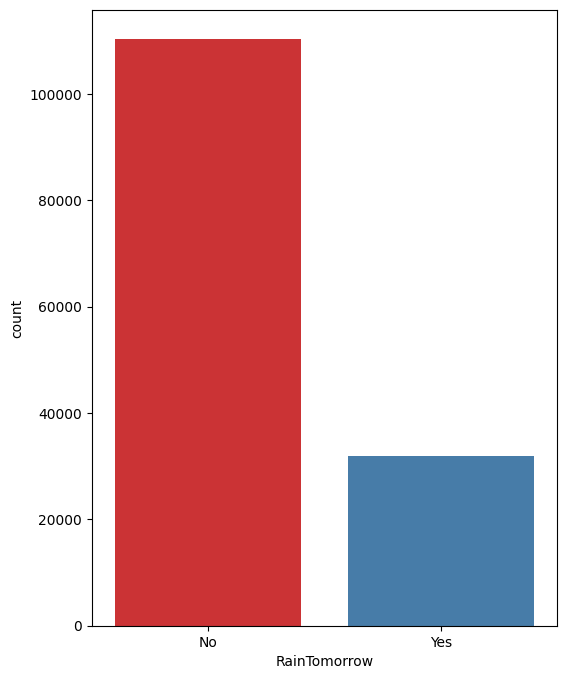

In [12]:
# using subplots and inidicate axis in countplot
# f, ax = plt.subplots(figsize=(6, 8))
# sns.countplot(x="RainTomorrow", data=df, palette="Set1", ax=ax)

# use figure and countplot directly
plt.figure(figsize=(6, 8))
sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

### Explore Categorical Variables <a class="anchor" id="6.2"></a>

In [13]:
# find categorical variables

# for every variable in the DataFrame columns,
# check if the data type is object (categorical)
# and add it to the categorical list
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
# view the categorical variables
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Explore problems within categorical variables <a class="anchor" id="6.4"></a>

#### Missing values in categorical variables

In [15]:
# check missing values in categorical variables
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [16]:
# print categorical variables containing missing values

# for every variable in the categorical list,
# check if the number of missing values is not equal to 0
# and add it to the cat1 list
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


#### Frequency count of categorical variables


Now, I will check the frequency counts of categorical variables.

In [17]:
# view frequency of categorical variables
for var in categorical: 
    print(df[var].value_counts(), '\n')

Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64 

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHa

In [18]:
# view frequency distribution of categorical variables

for var in categorical: 
    print(df[var].value_counts(normalize=True), '\n')

Date
2017-06-24    0.000337
2017-06-23    0.000337
2017-06-22    0.000337
2017-06-21    0.000337
2017-06-20    0.000337
                ...   
2008-01-27    0.000007
2008-01-28    0.000007
2008-01-29    0.000007
2008-01-30    0.000007
2008-01-31    0.000007
Name: proportion, Length: 3436, dtype: float64 

Location
Canberra            0.023622
Sydney              0.022989
Adelaide            0.021951
Darwin              0.021951
Hobart              0.021951
Perth               0.021951
Melbourne           0.021951
Brisbane            0.021951
Albury              0.020899
MountGinini         0.020899
GoldCoast           0.020899
Wollongong          0.020899
MountGambier        0.020899
Launceston          0.020899
AliceSprings        0.020899
Albany              0.020899
Townsville          0.020899
Bendigo             0.020899
Cairns              0.020899
Ballarat            0.020899
Penrith             0.020892
Newcastle           0.020892
Tuggeranong         0.020892
PerthAirport     

#### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model.

In [19]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


#### Feature Engineering of Date Variable

We can see that the data type of `Date` variable is object. We need to parse it into datetime format.

In [20]:
# parse the dates, currently coded as strings, into datetime format
print(df['Date'].head())
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object


0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [21]:
# extract year from date
df['Year'] = df['Date'].dt.year
print(df.columns)
df['Year'].head()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year'],
      dtype='object')


0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [22]:
# extract month from date
df['Month'] = df['Date'].dt.month
print(df.columns)
df['Month'].head()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')


0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [23]:
# extract day from date
df['Day'] = df['Date'].dt.day
print(df.columns)
df['Day'].head()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')


0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [24]:
# again view the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [25]:
# drop the original Date variable
df.drop('Date', axis=1, inplace=True)

In [26]:
# preview the dataset again
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [27]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### Explore `Location` variable

In [28]:
# print number of labels in Location variable and the values

print('Location contains', len(df.Location.unique()), 'labels')
df.Location.unique()

Location contains 49 labels


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [29]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [30]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Explore `WindGustDir` variable

In [31]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')
df['WindGustDir'].unique()

WindGustDir contains 17 labels


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [32]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [34]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

### Explore `WindDir9am` variable

In [35]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')
df['WindDir9am'].unique()

WindDir9am contains 17 labels


array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [36]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [37]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

### Explore `WindDir3pm` variable

In [39]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')
df['WindDir3pm'].unique()

WindDir3pm contains 17 labels


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [40]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [41]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [42]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

### Explore `RainToday` variable

In [43]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [44]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [46]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [47]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

### Explore Numerical Variables <a class="anchor" id="6.5"></a>

In [48]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [49]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Explore problems within numerical variables <a class="anchor" id="6.7"></a>


### Missing values in numerical variables

In [50]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

### Outliers in numerical variables

In [51]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()), 2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

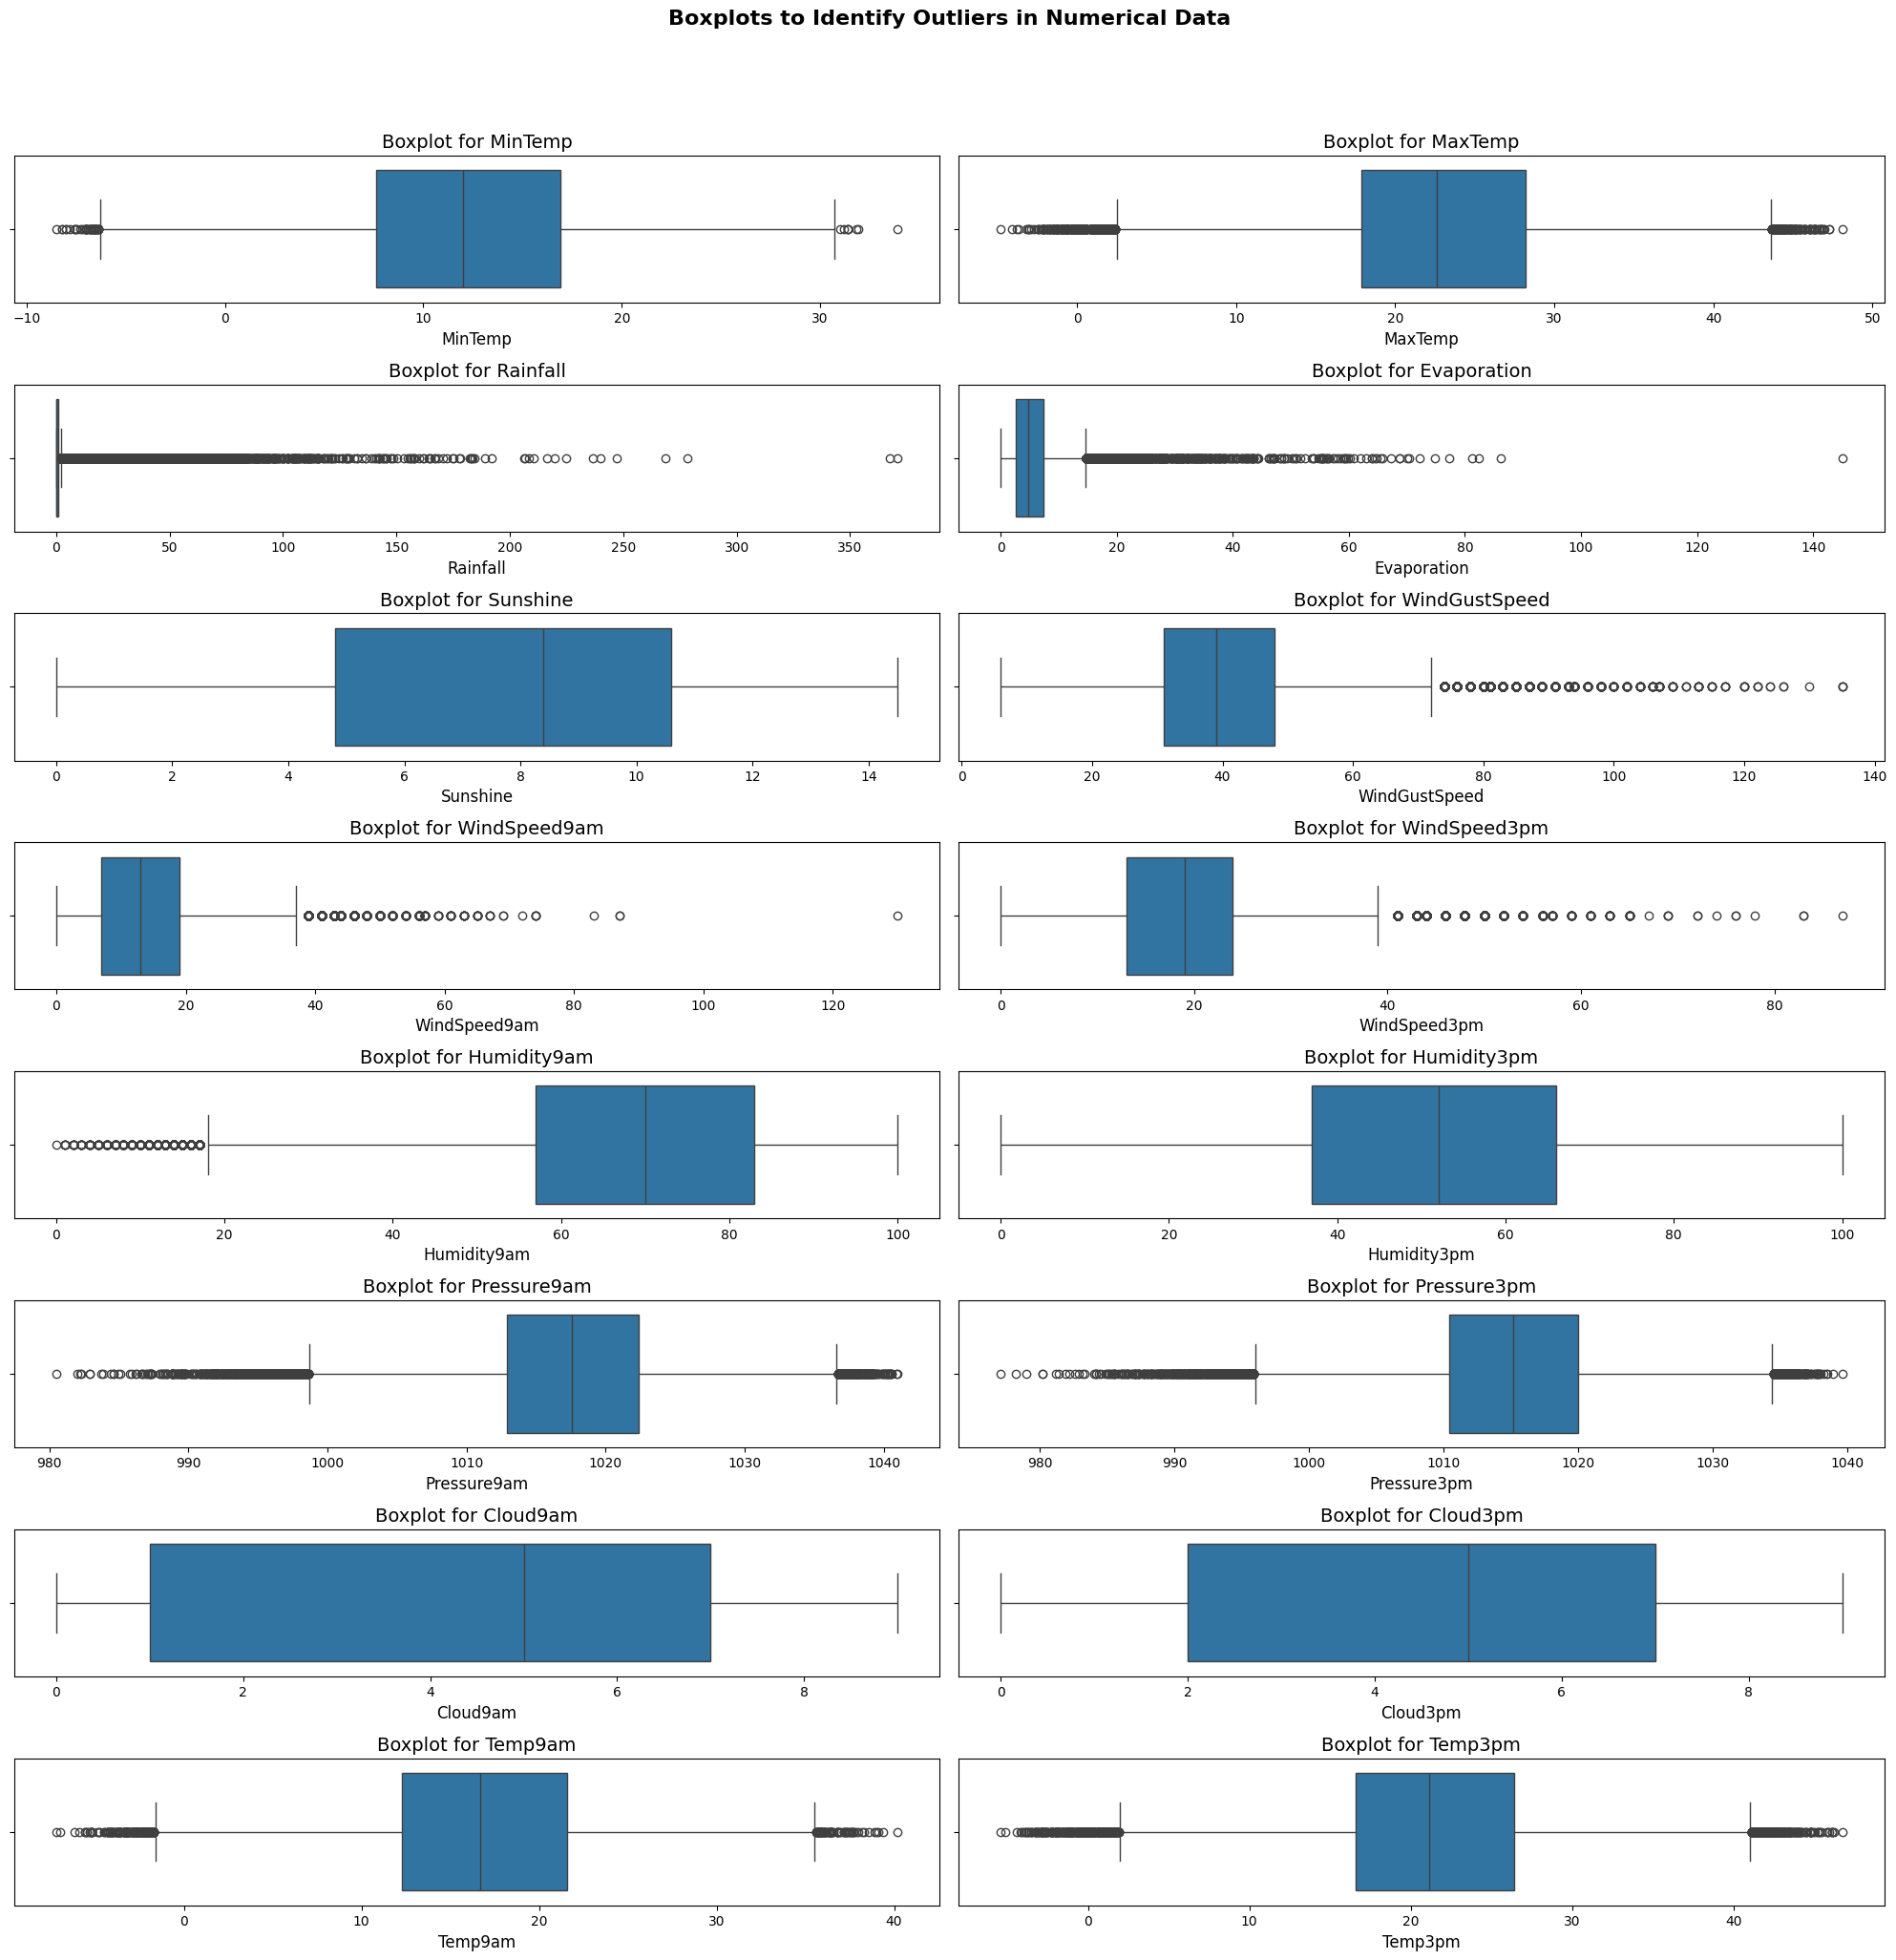

In [52]:
numer_cols = numerical[:-3] # Exclude the last three columns (Year, Month, Day)

# draw boxplots to visualize outliers
plt.figure(figsize=(20, 40))

# Create boxplots for each numerical column
for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

### Check the distribution of variables

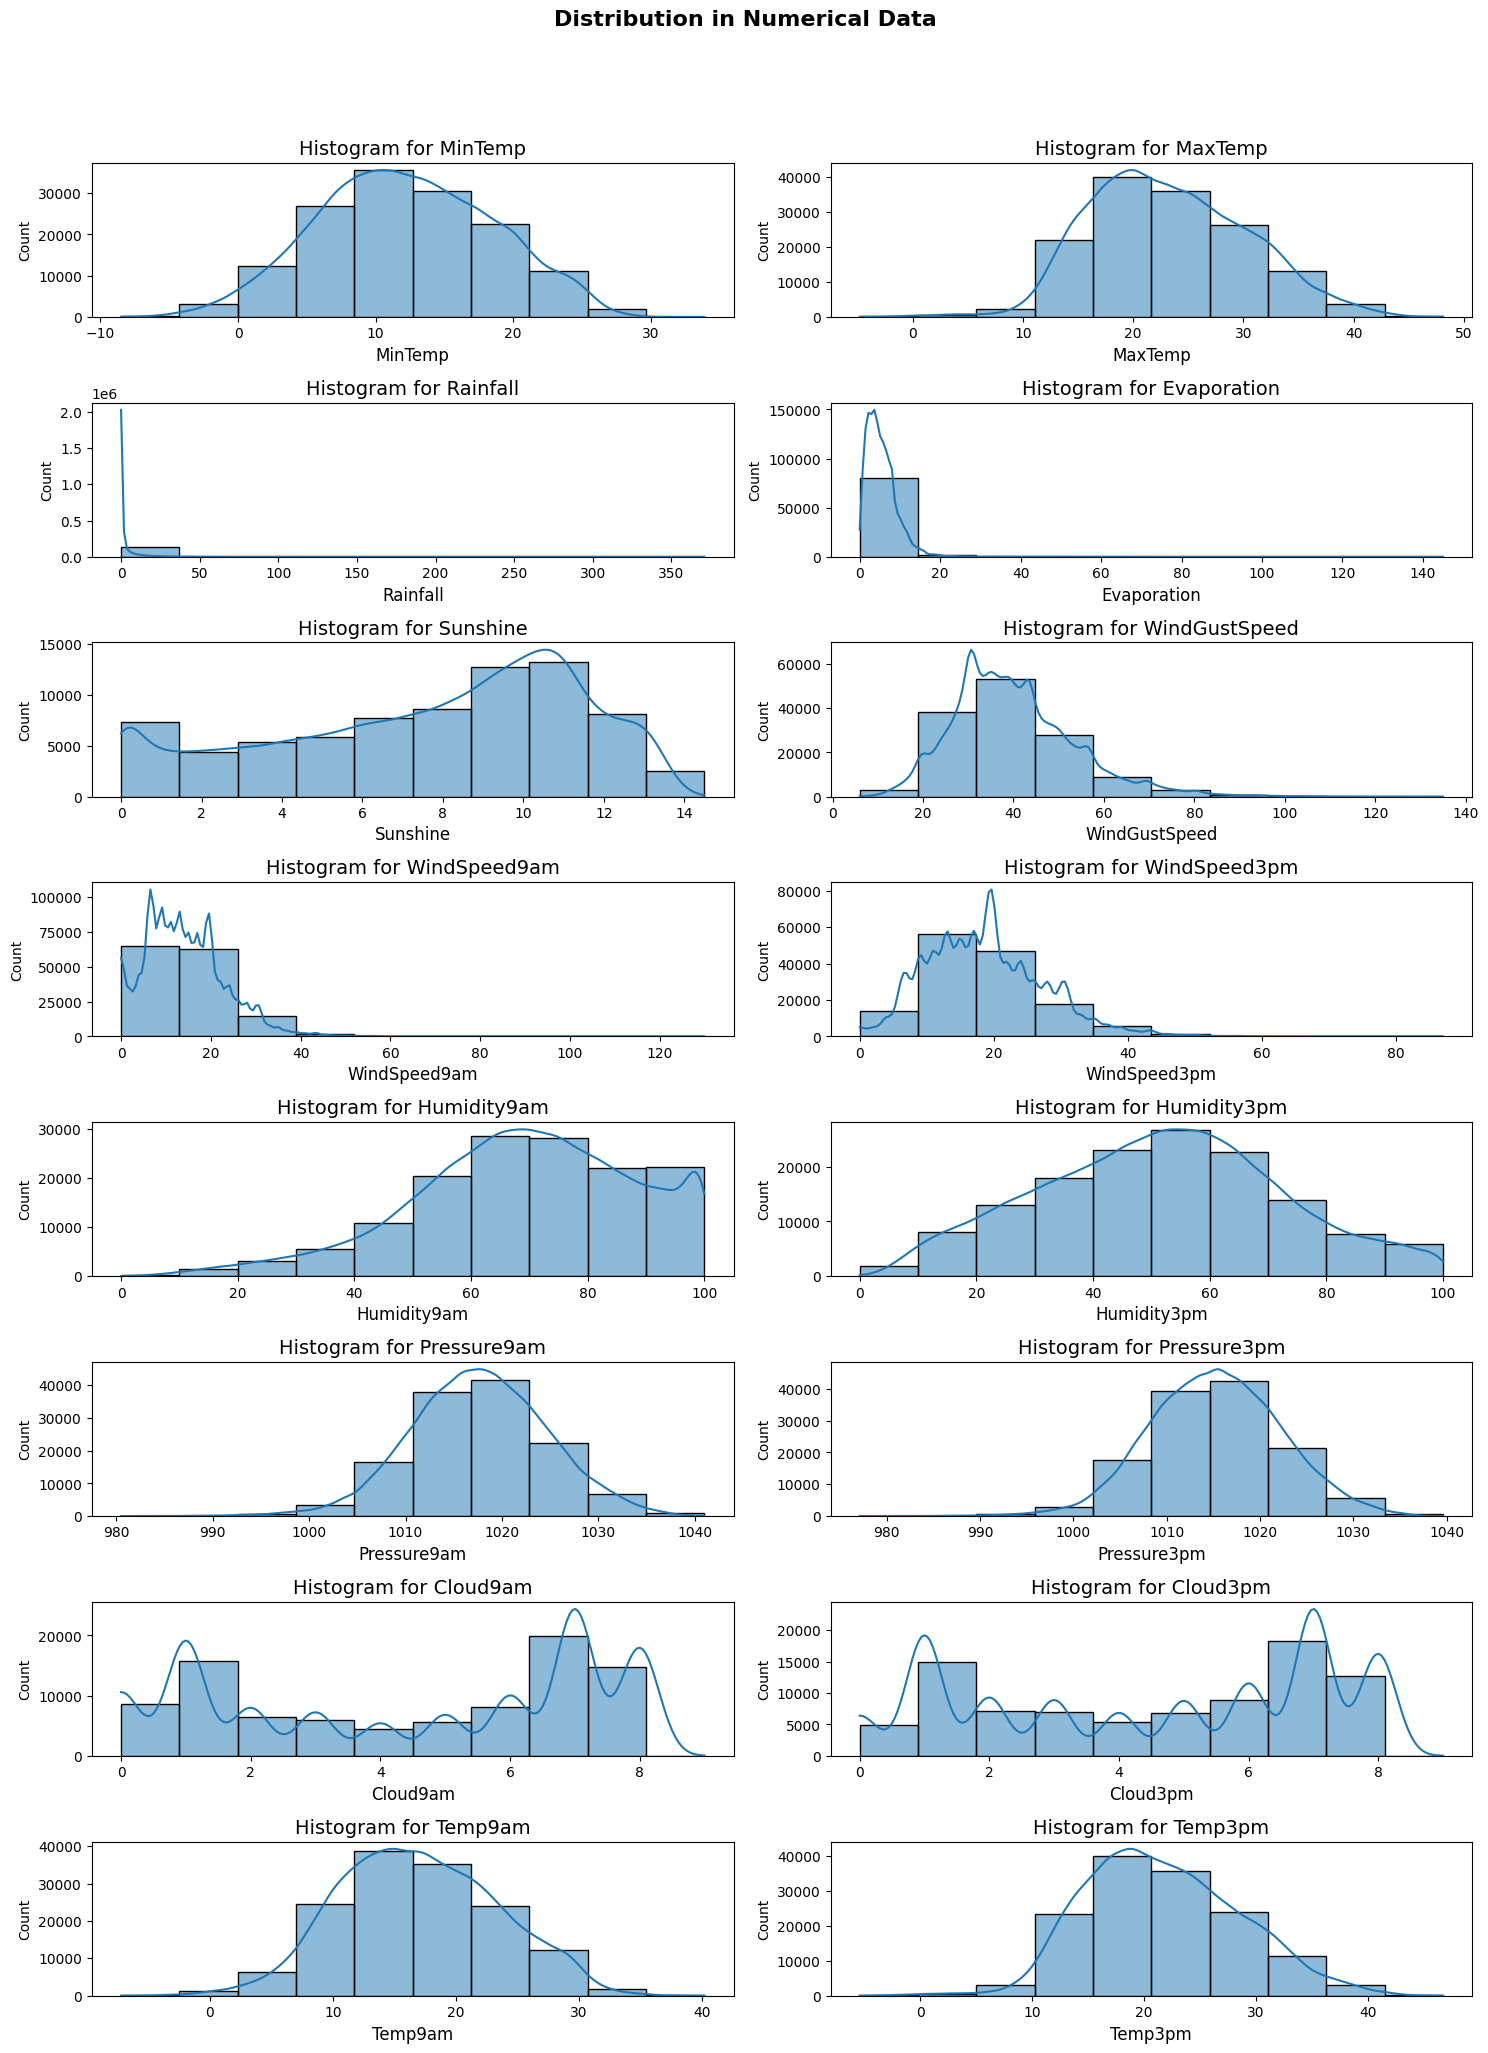

In [53]:
# plot histogram to check distribution

plt.figure(figsize=(15, 40))

for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Distribution in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

In [54]:
# find outliers for Rainfall variable
# The IQR method is used to identify outliers
# The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1)
# Outliers are defined as values that are below Q1 - 1.5*IQR or above Q3 + 1.5*IQR

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -1.2000000000000002 or > 2.0


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [55]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 1.5)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -4.600000000000001 or > 14.600000000000001


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [56]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -11.0 or > 37.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [57]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -3.5 or > 40.5


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

## 7. Multivariate Analysis <a class="anchor" id="7"></a>

An important step in EDA is to discover patterns and relationships between variables in the dataset. We will use heat map and pair plot to discover the patterns and relationships in the dataset.

In [58]:
# corr() method computes the pairwise correlation of columns
correlation = df.corr(numeric_only=True)

### Heat Map <a class="anchor" id="7.1"></a>

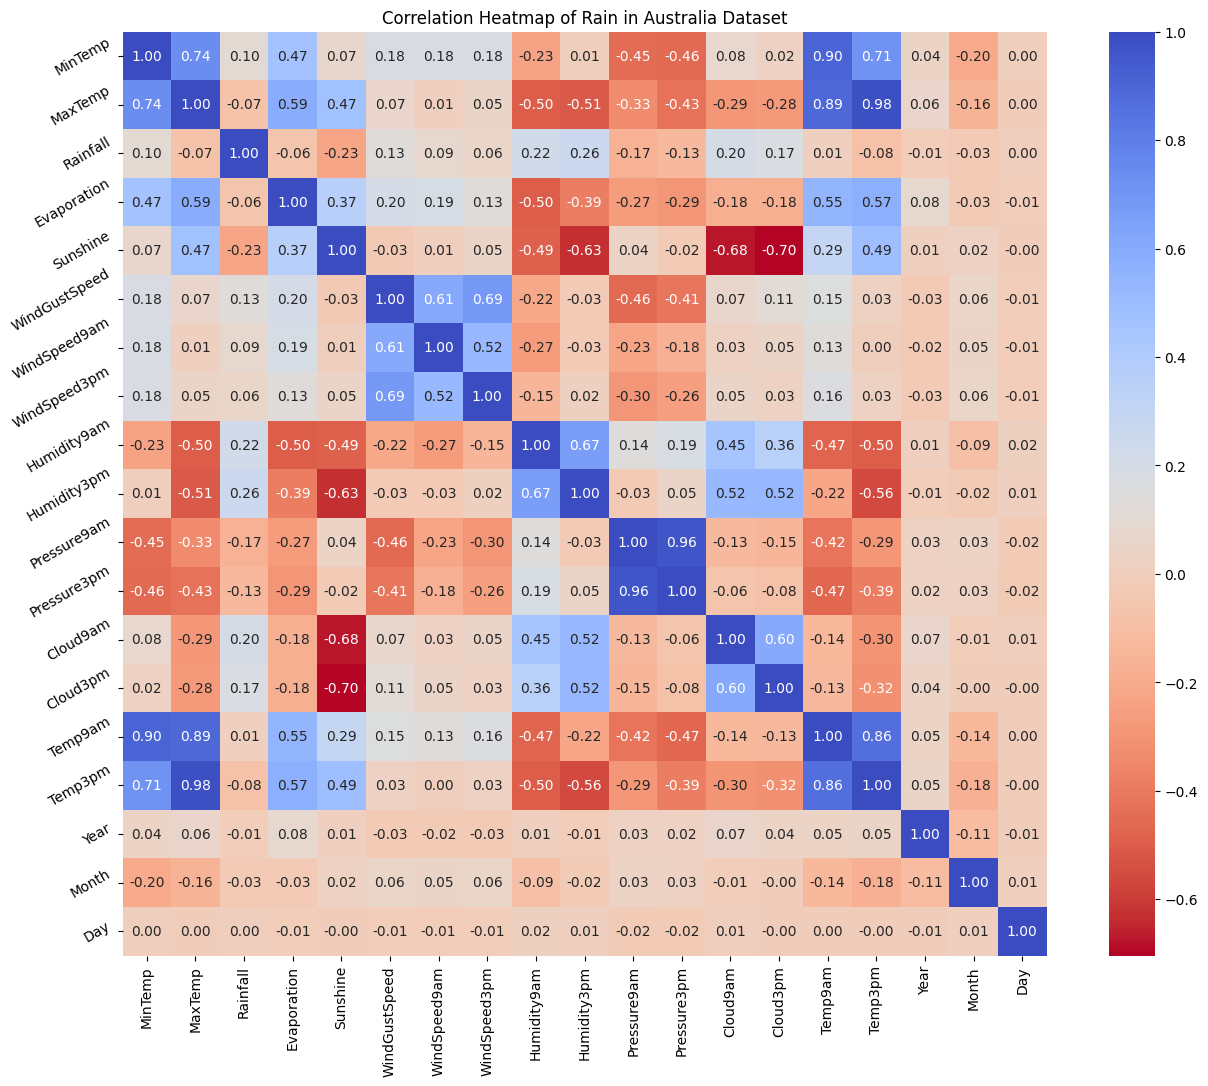

In [59]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', cmap='coolwarm_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Interpretation



From the above correlation heat map, we can conclude that :-

- `MinTemp` and `MaxTemp` variables are highly positively correlated (correlation coefficient = 0.74).

- `MinTemp` and `Temp3pm` variables are also highly positively correlated (correlation coefficient = 0.71).

- `MinTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.90).

- `MaxTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.89).

- `MaxTemp` and `Temp3pm` variables are also strongly positively correlated (correlation coefficient = 0.98).

- `WindGustSpeed` and `WindSpeed3pm` variables are highly positively correlated (correlation coefficient = 0.69).

- `Pressure9am` and `Pressure3pm` variables are strongly positively correlated (correlation coefficient = 0.96).

- `Temp9am` and `Temp3pm` variables are strongly positively correlated (correlation coefficient = 0.86).


### Pair Plot <a class="anchor" id="7.2"></a>


First of all, we define extract the variables which are highly positively correlated. 

In [60]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

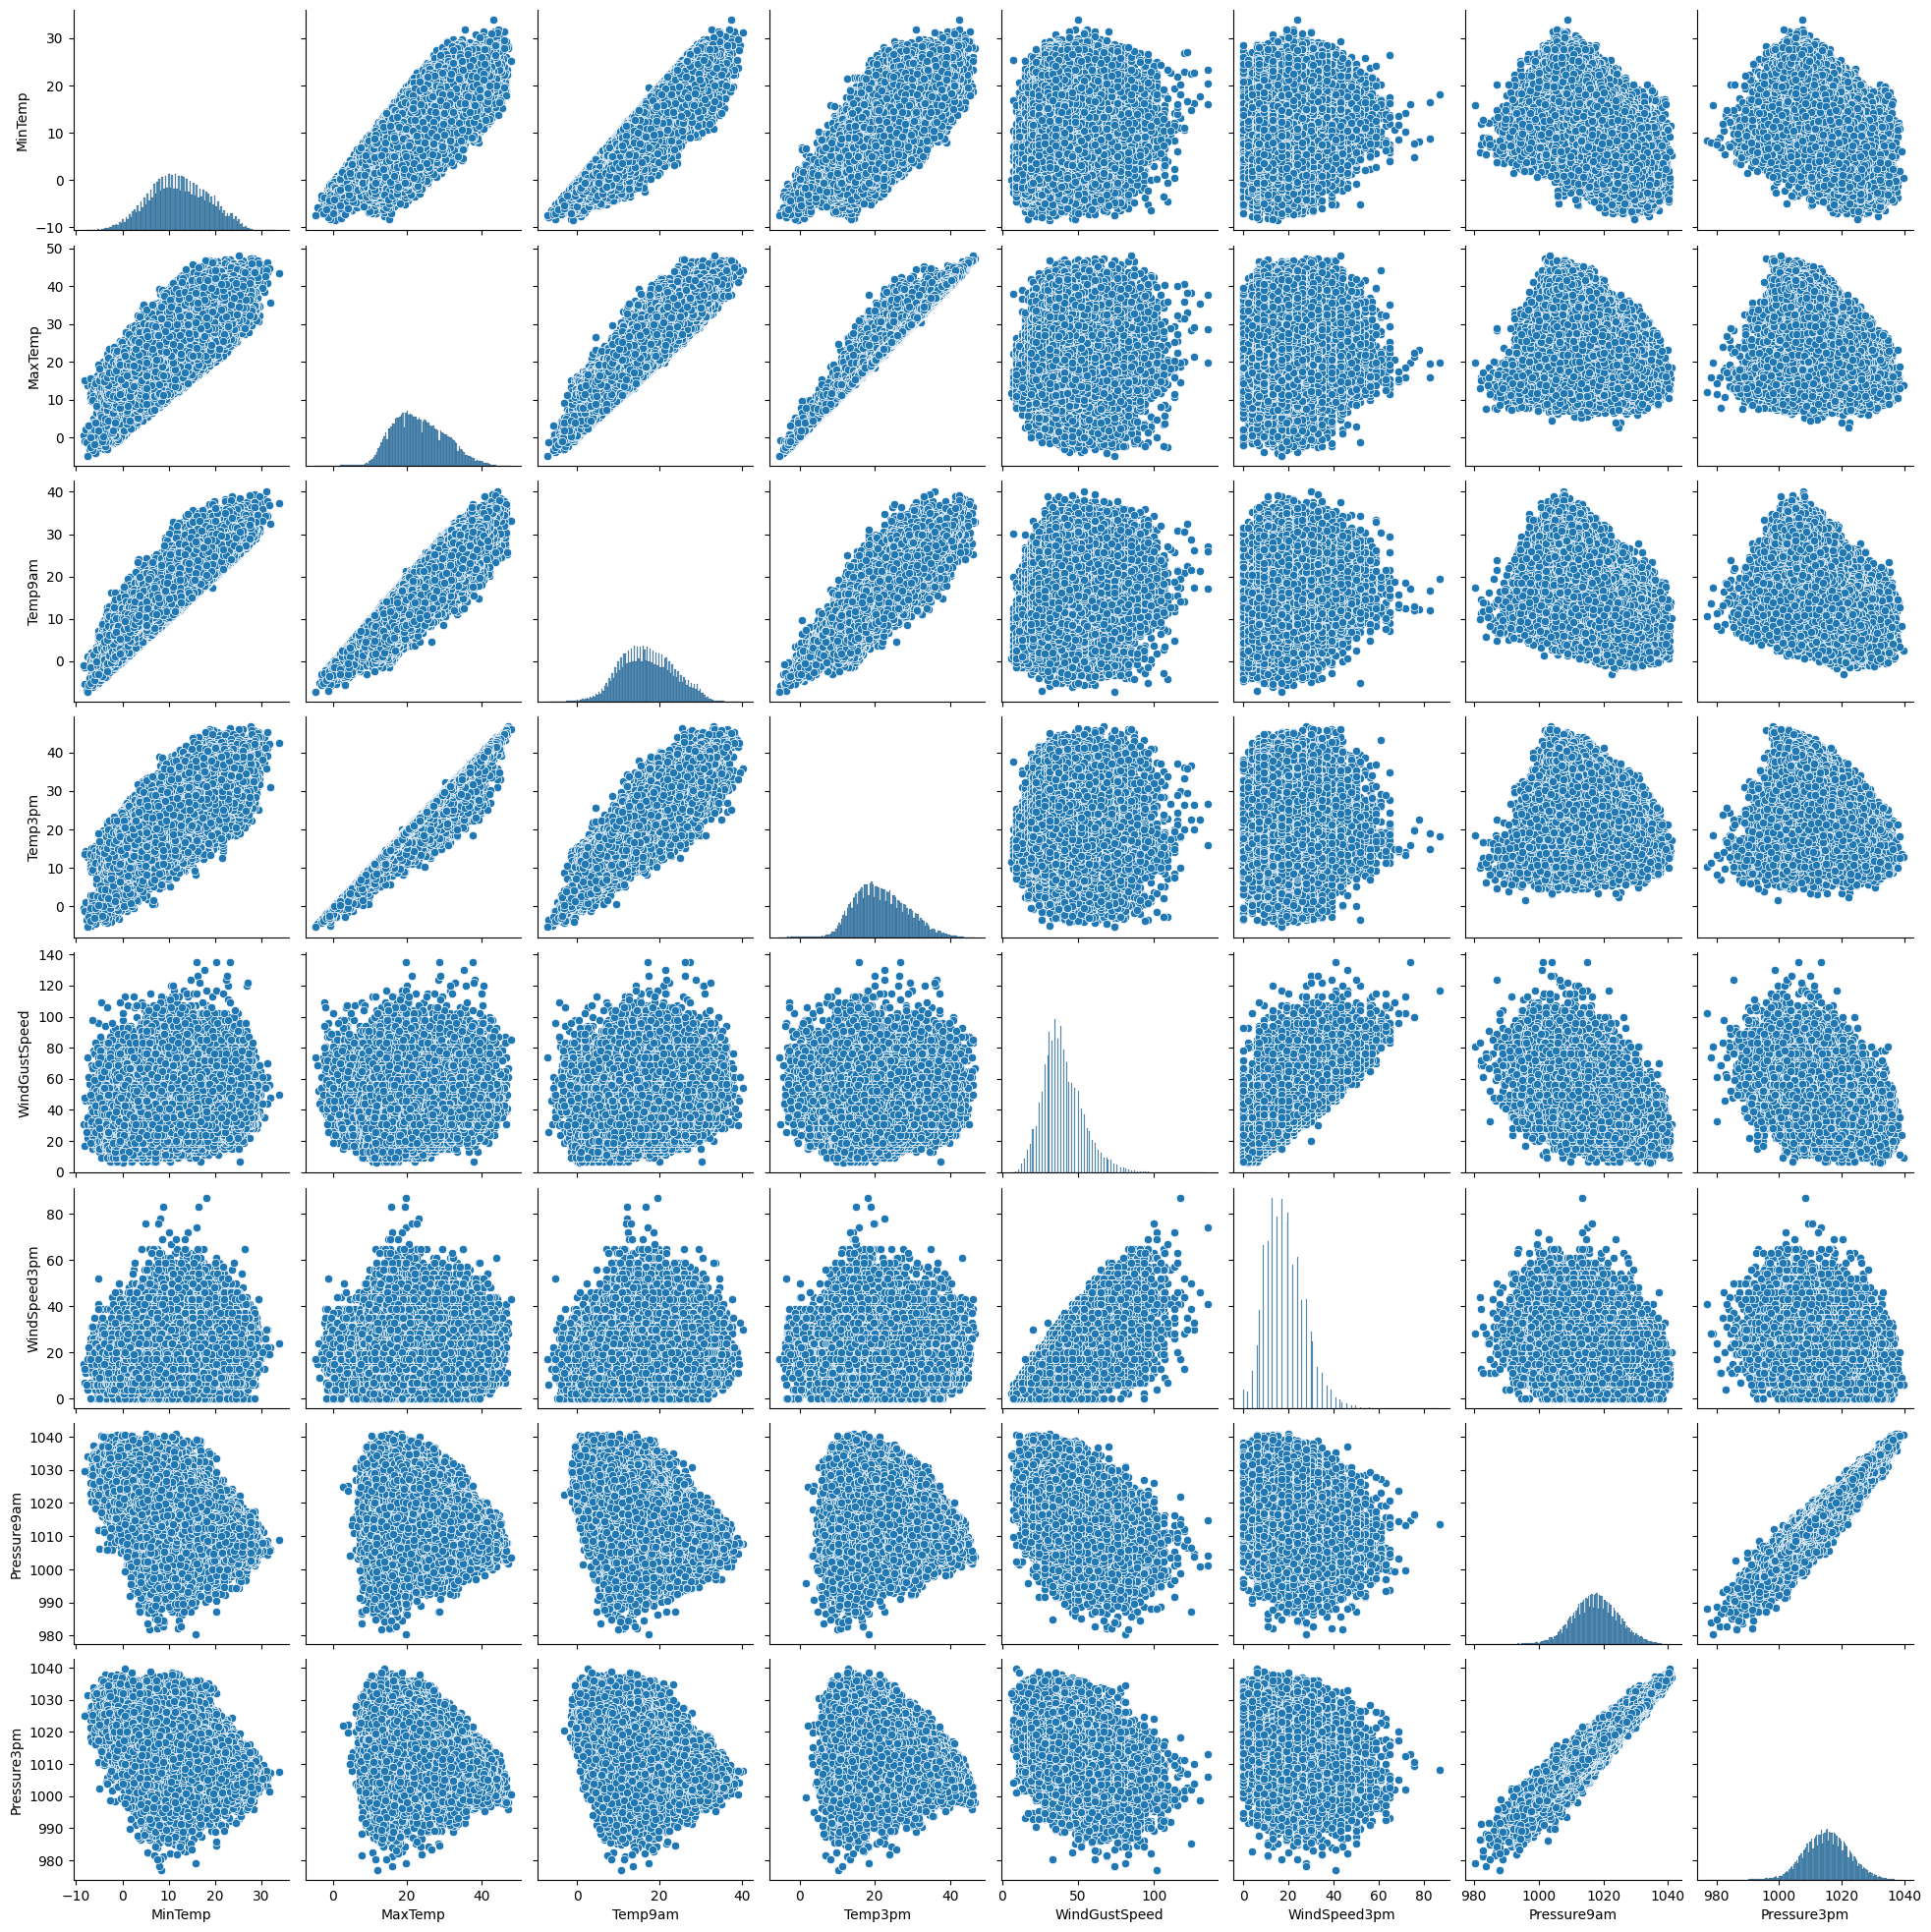

In [61]:
# Draw the plots of the defined variables
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## 8. Declare feature vector and target variable <a class="anchor" id="8"></a>

In [62]:
# Delete the rows with missing values in the target variable
df.dropna(subset=['RainTomorrow'], inplace=True)

# Features
X = df.drop(['RainTomorrow'], axis=1)

# Target
y = df['RainTomorrow']

## 9. Split data into separate training and test set <a class="anchor" id="9"></a>

In [63]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [64]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

## 10. Feature Engineering <a class="anchor" id="10"></a>


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [65]:
# check data types in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [66]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [67]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables <a class="anchor" id="10.1"></a>



In [68]:
# check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp            525
MaxTemp            268
Rainfall          1182
Evaporation      48791
Sunshine         54345
WindGustSpeed     7406
WindSpeed9am      1083
WindSpeed3pm      2109
Humidity9am       1420
Humidity3pm       2913
Pressure9am      11257
Pressure3pm      11225
Cloud9am         43041
Cloud3pm         45767
Temp9am            736
Temp3pm           2206
Year                 0
Month                0
Day                  0
dtype: int64

In [69]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp            112
MaxTemp             54
Rainfall           224
Evaporation      12052
Sunshine         13471
WindGustSpeed     1864
WindSpeed9am       265
WindSpeed3pm       521
Humidity9am        354
Humidity3pm        697
Pressure9am       2757
Pressure3pm       2756
Cloud9am         10616
Cloud3pm         11327
Temp9am            168
Temp3pm            520
Year                 0
Month                0
Day                  0
dtype: int64

#### Assumption


Assuming that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


We will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid data leakage.

In [70]:
# impute missing values in X_train and X_test with respective column median in X_train
# for df1 in [X_train, X_test]:
#     for col in numerical:
#         col_median=X_train[col].median()
#         df1[col].fillna(col_median, inplace=True)           

# impute using SimpleImputer
from sklearn.impute import SimpleImputer
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')
# Fit the imputer on the training data
imputer.fit(X_train[numerical])
# Transform the training data
X_train[numerical] = imputer.transform(X_train[numerical])
# Transform the test data
X_test[numerical] = imputer.transform(X_test[numerical])

In [71]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [72]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### Engineering missing values in categorical variables <a class="anchor" id="10.2"></a>

In [73]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().sum()

Location          0
WindGustDir    7458
WindDir9am     8036
WindDir3pm     3023
RainToday      1182
dtype: int64

In [74]:
# impute missing categorical variables with most frequent value
# for df2 in [X_train, X_test]:
#     df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
#     df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
#     df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
#     df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

# impute using SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
# Fit the imputer on the training data
cat_imputer.fit(X_train[categorical])
# Transform the training data
X_train[categorical] = cat_imputer.transform(X_train[categorical])
# Transform the test data
X_test[categorical] = cat_imputer.transform(X_test[categorical])

In [75]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Engineering outliers in numerical variables <a class="anchor" id="10.3"></a>


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers.

In [77]:
# using top-cap method to limit the maximum value of the variables
# def max_value(df3, variable, top):
#     return np.where(df3[variable]>top, top, df3[variable])

# for df3 in [X_train, X_test]:
#     df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
#     df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
#     df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
#     df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

# using winsor method to limit the maximum value of the variables
from scipy.stats.mstats import winsorize

winsor_limits = {}

for col in numer_cols:
    # Calculate the lower and upper quantiles (e.g., 1st and 99th percentiles)
    lower_q = X_train[col].quantile(0.01)
    upper_q = X_train[col].quantile(0.99)
    # Calculate the proportion of data below/above these quantiles in X_train
    lower_prop = (X_train[col] < lower_q).mean()
    upper_prop = (X_train[col] > upper_q).mean()
    winsor_limits[col] = (lower_prop, upper_prop)

print(winsor_limits)
# Apply winsorization using the calculated limits
for set in [X_train, X_test]:
    for col in numer_cols:
        lower, upper = winsor_limits[col]
        set[col] = winsorize(set[col], limits=(lower, upper), inplace=False)


{'MinTemp': (np.float64(0.009898553017915854), np.float64(0.009151326546758796)), 'MaxTemp': (np.float64(0.009924925716897867), np.float64(0.009933716616558539)), 'Rainfall': (np.float64(0.0), np.float64(0.009916134817237196)), 'Evaporation': (np.float64(0.005441566889955518), np.float64(0.009872180318933839)), 'Sunshine': (np.float64(0.0), np.float64(0.009230444643704837)), 'WindGustSpeed': (np.float64(0.00587232097332841), np.float64(0.009274399142008193)), 'WindSpeed9am': (np.float64(0.0), np.float64(0.00911616294811611)), 'WindSpeed3pm': (np.float64(0.007648082704784008), np.float64(0.008729363363046574)), 'Humidity9am': (np.float64(0.009898553017915854), np.float64(0.0)), 'Humidity3pm': (np.float64(0.009511753432846317), np.float64(0.009924925716897867)), 'Pressure9am': (np.float64(0.009995252914183237), np.float64(0.009845807619951826)), 'Pressure3pm': (np.float64(0.009933716616558539), np.float64(0.009986462014522567)), 'Cloud9am': (np.float64(0.0), np.float64(0.0)), 'Cloud3pm':

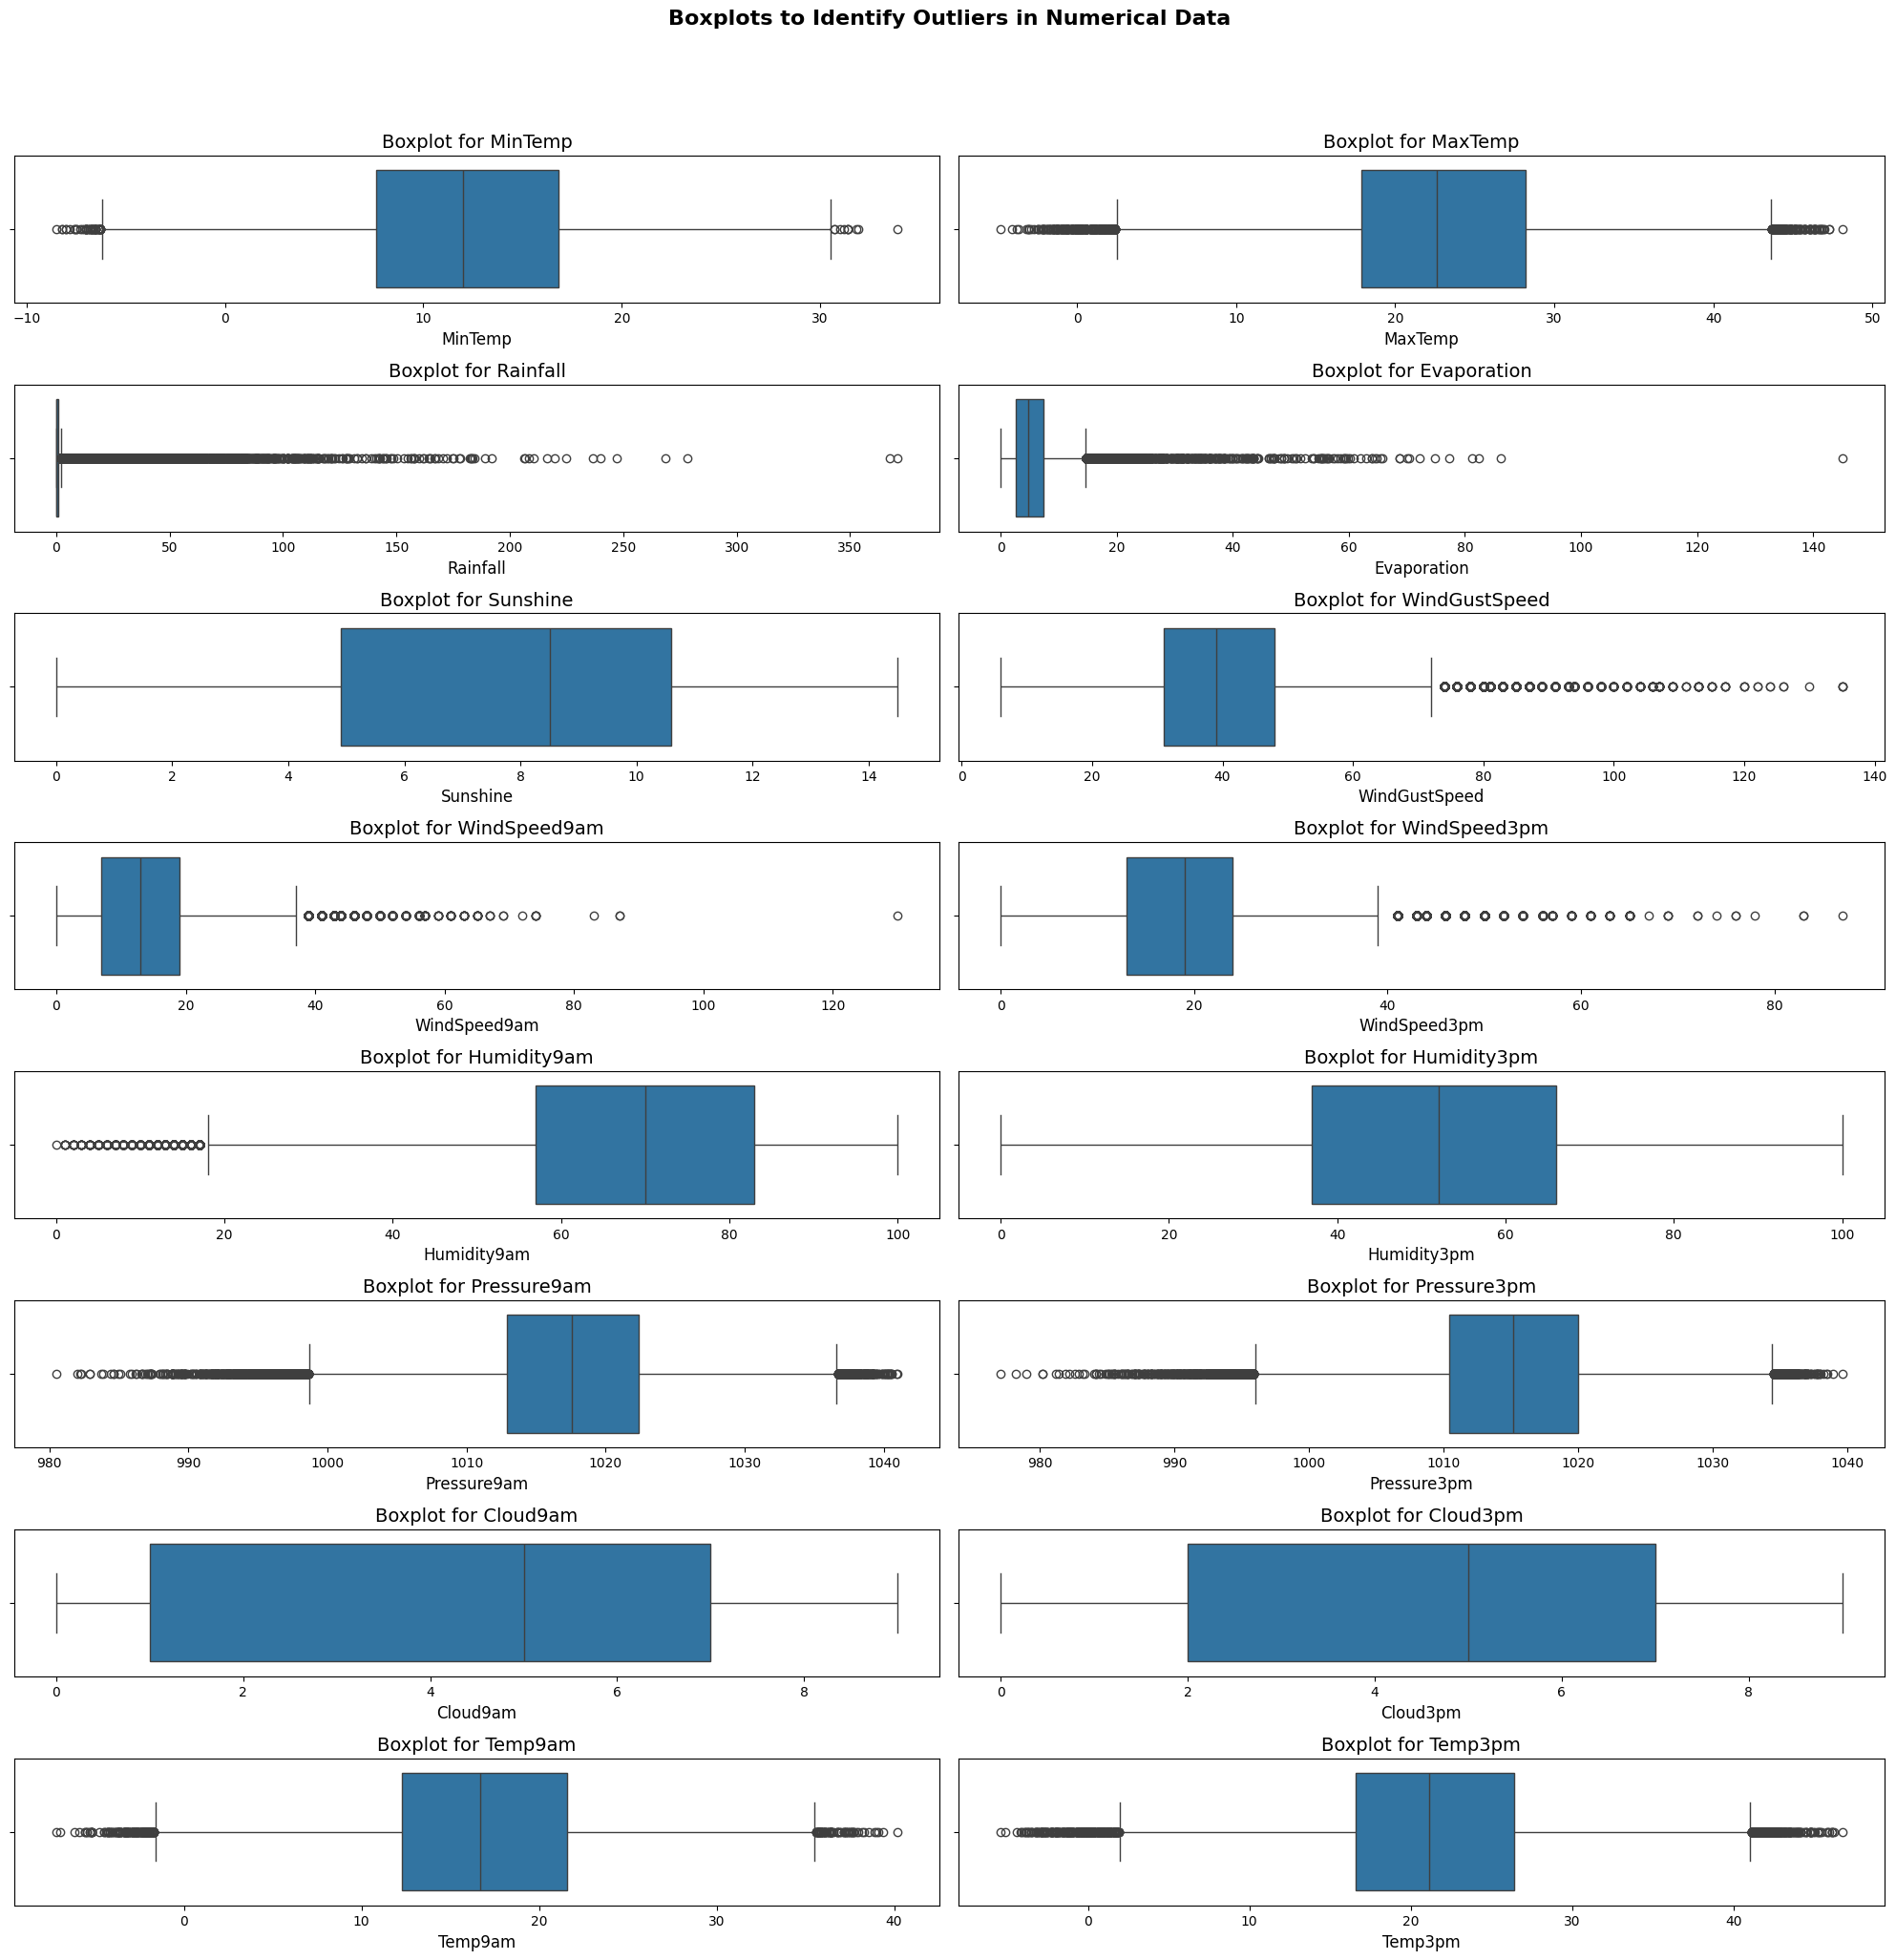

In [78]:
plt.figure(figsize=(20, 40))

# Create boxplots for each numerical column
for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

In [79]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.180665,23.243133,2.056902,5.110997,7.991455,39.827997,13.920627,18.598317,68.892092,51.488484,1017.665746,1015.269103,4.647652,4.701443,16.985090,21.690690,2012.757802,6.400891,15.707826
std,6.322627,6.964366,5.809834,2.648815,2.753077,12.775211,8.612241,8.503888,18.791243,20.431417,6.584906,6.527782,2.292660,2.118948,6.378054,6.730318,2.541504,3.423346,8.797404
min,-1.800000,9.100000,0.000000,0.400000,0.000000,15.000000,0.000000,2.000000,18.000000,9.000000,1000.700000,998.900000,0.000000,0.000000,2.600000,7.700000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,25.800000,40.100000,37.200000,15.800000,13.200000,80.000000,39.000000,43.000000,100.000000,97.000000,1033.700000,1031.300000,8.000000,8.000000,31.200000,38.500000,2017.000000,12.000000,31.000000


### Encode categorical variables <a class="anchor" id="10.4"></a>

In [80]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
18401,NorahHead,SSW,NW,W,No
127797,Walpole,WSW,WNW,W,Yes
40012,Williamtown,ENE,W,E,No
130914,Hobart,WNW,WNW,WNW,No
41742,Williamtown,S,SW,SSE,No


In [81]:
# encode RainToday variable using BinaryEncoder

# from category_encoders import BinaryEncoder

# encoder = BinaryEncoder(cols=['RainToday'])
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.transform(X_test)

# using onehotencoder
from sklearn.preprocessing import OneHotEncoder

# Instantiate the encoder (drop='first' to avoid multicollinearity)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit on X_train[categorical] only
ohe.fit(X_train[categorical])

# Transform both train and test
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train[categorical]),
    columns=ohe.get_feature_names_out(categorical),
    index=X_train.index
)
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[categorical]),
    columns=ohe.get_feature_names_out(categorical),
    index=X_test.index
)

# Concatenate numerical columns with encoded categorical columns
X_train = pd.concat([X_train[numerical], X_train_ohe], axis=1)
X_test = pd.concat([X_test[numerical], X_test_ohe], axis=1)

In [82]:
print(X_train.columns)
X_train.head()

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_Yes'],
      dtype='object', length=113)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
18401,15.1,23.9,0.0,4.8,8.4,67.0,19.0,22.0,38.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127797,9.7,14.2,7.6,4.8,8.4,50.0,15.0,28.0,91.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40012,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130914,7.6,14.8,0.0,4.0,7.0,80.0,30.0,35.0,52.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41742,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# Encode target column
ohe_y = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit only on 'RainTomorrow' from X_train
ohe_y.fit(y_train[['RainTomorrow']])

# Transform 'RainTomorrow' in both train and test
y_train_rain = pd.DataFrame(
    ohe_y.transform(y_train[['RainTomorrow']]),
    columns=ohe_y.get_feature_names_out(['RainTomorrow']),
    index=y_train.index
)
y_test_rain = pd.DataFrame(
    ohe_y.transform(y_test[['RainTomorrow']]),
    columns=ohe_y.get_feature_names_out(['RainTomorrow']),
    index=y_test.index
)

y_test_rain

,RainTomorrow_Yes
57760,1.0
127128,0.0
119994,0.0
7088,0.0
62992,1.0
...,...
59458,1.0
73138,0.0
35876,0.0
59558,0.0


In [84]:
# dataframe to series
y_train = y_train_rain.iloc[:, 0]
y_test = y_test_rain.iloc[:, 0]

y_train

18401     0.0
127797    1.0
40012     0.0
130914    0.0
41742     0.0
         ... 
112920    1.0
122810    0.0
106280    0.0
135107    1.0
124925    0.0
Name: RainTomorrow_Yes, Length: 113754, dtype: float64

## 11. Feature Scaling <a class="anchor" id="11"></a>

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`.

In [85]:
# not truncate output
pd.set_option('display.max_columns', None)
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.180665,23.243133,2.056902,5.110997,7.991455,39.827997,13.920627,18.598317,68.892092,51.488484,1017.665746,1015.269103,4.647652,4.701443,16.985090,21.690690,2012.757802,6.400891,15.707826,0.021239,0.021054,0.021133,0.020870,0.021195,0.021256,0.022478,0.020790,0.024069,0.020984,0.021019,0.02065,0.022461,0.020958,0.022505,0.011173,0.021441,0.017362,0.021081,0.021441,0.019885,0.021142,0.020386,0.020808,0.010699,0.020474,0.020905,0.021010,0.019621,0.021028,0.022408,0.021248,0.020975,0.020659,0.021125,0.020808,0.023102,0.020764,0.021125,0.021371,0.010751,0.020896,0.019841,0.020931,0.017872,0.021133,0.020711,0.021186,0.055769,0.051453,0.063092,0.04983

In [86]:
cols = X_train.columns
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_Yes'],
      dtype='object', length=113)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[0.32246377, 0.12580645, 0.23655914, ..., 1.        , 0.        ,
        1.        ],
       [0.54347826, 0.29677419, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39855072, 0.43870968, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47101449, 0.5483871 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36594203, 0.37741935, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38768116, 0.30645161, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(28439, 113))

In [88]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [89]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [90]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.506546,0.456230,0.055293,0.305909,0.605413,0.381969,0.356939,0.404837,0.620635,0.482824,0.514114,0.505219,0.580956,0.587680,0.502975,0.454243,0.57578,0.490990,0.490261,0.021239,0.021054,0.021133,0.020870,0.021195,0.021256,0.022478,0.020790,0.024069,0.020984,0.021019,0.02065,0.022461,0.020958,0.022505,0.011173,0.021441,0.017362,0.021081,0.021441,0.019885,0.021142,0.020386,0.020808,0.010699,0.020474,0.020905,0.021010,0.019621,0.021028,0.022408,0.021248,0.020975,0.020659,0.021125,0.020808,0.023102,0.020764,0.021125,0.021371,0.010751,0.020896,0.019841,0.020931,0.017872,0.021133,0.020711,0.021186,0.055769,0.051453,0.063092,0.049836,0.044851,0.046504,0

We now have `X_train` dataset ready to be fed into the classifier.

## 12. References <a class="anchor" id="23"></a>

Original code: https://www.kaggle.com/code/prashant111/extensive-analysis-eda-fe-modelling#7.-Multivariate-Analysis-

The work done in this project is inspired from the following books and websites:-

1.	Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron.

2.	Introduction to Machine Learning with Python by Andreas C Muller and Sarah Guido.

3.	Udemy course – Feature Engineering for Machine Learning by Soledad Galli.
